In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

train_data=pd.read_csv("mnist_train.csv")
test_data=pd.read_csv("mnist_test.csv")

In [2]:
# Split the data into training and test sets
X_train = train_data.iloc[:, 1:].values.astype('float32') # All columns except the first (pixel values)
y_train = train_data.iloc[:, 0].values.astype('int')   # The first column is the label (digit class)

X_test = test_data.iloc[:, 1:].values.astype('float')  # All columns except the first (pixel values)
y_test = test_data.iloc[:, 0].values.astype('int')   # The first column is the label (digit class)


In [3]:
# Normalize the pixel values
X_train /= 255.0
X_test /= 255.0

# Shuffle the data
X_train,y_train = shuffle(X_train,y_train,random_state=42)

# Split the data 
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [4]:
#Convert labels to one-hot encoding
num_classes=10
y_train_split=tf.keras.utils.to_categorical(y_train_split, num_classes)
y_val_split=tf.keras.utils.to_categorical(y_val_split,num_classes)
y_test=tf.keras.utils.to_categorical(y_test,num_classes)


In [5]:
# Bulid the DNN Model
model=tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(num_classes,activation='softmax')
])

# Use the TensorFlow 2,x optimmizer
optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)

# Compile the model
model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model 
history=model.fit(
    X_train_split, y_train_split,
    validation_data=(X_val_split,y_val_split),
    epochs=20,
    batch_size=32,
    verbose=2
)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test accuracy: {test_accuracy: .4f}")

# Save the model using the recommended Keras Format
model.save('mnist_dnn_model.keras')


Epoch 1/20
1500/1500 - 3s - 2ms/step - accuracy: 0.9272 - loss: 0.2423 - val_accuracy: 0.9555 - val_loss: 0.1457
Epoch 2/20
1500/1500 - 2s - 1ms/step - accuracy: 0.9685 - loss: 0.0994 - val_accuracy: 0.9653 - val_loss: 0.1149
Epoch 3/20
1500/1500 - 2s - 1ms/step - accuracy: 0.9781 - loss: 0.0685 - val_accuracy: 0.9697 - val_loss: 0.1009
Epoch 4/20
1500/1500 - 2s - 1ms/step - accuracy: 0.9829 - loss: 0.0530 - val_accuracy: 0.9690 - val_loss: 0.1103
Epoch 5/20
1500/1500 - 2s - 1ms/step - accuracy: 0.9870 - loss: 0.0416 - val_accuracy: 0.9771 - val_loss: 0.0806
Epoch 6/20
1500/1500 - 2s - 1ms/step - accuracy: 0.9889 - loss: 0.0341 - val_accuracy: 0.9771 - val_loss: 0.0891
Epoch 7/20
1500/1500 - 2s - 1ms/step - accuracy: 0.9909 - loss: 0.0280 - val_accuracy: 0.9722 - val_loss: 0.1108
Epoch 8/20
1500/1500 - 2s - 1ms/step - accuracy: 0.9911 - loss: 0.0279 - val_accuracy: 0.9735 - val_loss: 0.1083
Epoch 9/20
1500/1500 - 2s - 1ms/step - accuracy: 0.9926 - loss: 0.0231 - val_accuracy: 0.9777 - 

## Change in Epochs

In [6]:
# Bulid the DNN Model
model=tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(num_classes,activation='softmax')
])

# Use the TensorFlow 2,x optimmizer
optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)

# Compile the model
model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model 
history=model.fit(
    X_train_split, y_train_split,
    validation_data=(X_val_split,y_val_split),
    epochs=100,
    batch_size=32,
    verbose=2
)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test accuracy: {test_accuracy: .4f}")

# Save the model using the recommended Keras Format
model.save('mnist_dnn_model.keras')


Epoch 1/100
1500/1500 - 3s - 2ms/step - accuracy: 0.9293 - loss: 0.2351 - val_accuracy: 0.9664 - val_loss: 0.1131
Epoch 2/100
1500/1500 - 2s - 1ms/step - accuracy: 0.9706 - loss: 0.0980 - val_accuracy: 0.9675 - val_loss: 0.1045
Epoch 3/100
1500/1500 - 2s - 1ms/step - accuracy: 0.9784 - loss: 0.0680 - val_accuracy: 0.9757 - val_loss: 0.0839
Epoch 4/100
1500/1500 - 2s - 1ms/step - accuracy: 0.9833 - loss: 0.0511 - val_accuracy: 0.9739 - val_loss: 0.0999
Epoch 5/100
1500/1500 - 2s - 1ms/step - accuracy: 0.9869 - loss: 0.0417 - val_accuracy: 0.9742 - val_loss: 0.0899
Epoch 6/100
1500/1500 - 2s - 1ms/step - accuracy: 0.9884 - loss: 0.0350 - val_accuracy: 0.9744 - val_loss: 0.0999
Epoch 7/100
1500/1500 - 2s - 1ms/step - accuracy: 0.9904 - loss: 0.0297 - val_accuracy: 0.9747 - val_loss: 0.1011
Epoch 8/100
1500/1500 - 2s - 1ms/step - accuracy: 0.9924 - loss: 0.0249 - val_accuracy: 0.9725 - val_loss: 0.1180
Epoch 9/100
1500/1500 - 2s - 1ms/step - accuracy: 0.9923 - loss: 0.0227 - val_accuracy: 

#### Test Accuracy got increased by increasing the epochs from 20 to 100 (0.0044 difference betweenabove and this accuracy)

## Change in Batch size

In [7]:
# Bulid the DNN Model
model=tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(num_classes,activation='softmax')
])

# Use the TensorFlow 2,x optimmizer
optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)

# Compile the model
model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model 
history=model.fit(
    X_train_split, y_train_split,
    validation_data=(X_val_split,y_val_split),
    epochs=20,
    batch_size=64,
    verbose=2
)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test accuracy: {test_accuracy: .4f}")

# Save the model using the recommended Keras Format
model.save('mnist_dnn_model.keras')


Epoch 1/20
750/750 - 2s - 3ms/step - accuracy: 0.9243 - loss: 0.2572 - val_accuracy: 0.9609 - val_loss: 0.1266
Epoch 2/20
750/750 - 1s - 2ms/step - accuracy: 0.9688 - loss: 0.0994 - val_accuracy: 0.9712 - val_loss: 0.0924
Epoch 3/20
750/750 - 1s - 2ms/step - accuracy: 0.9784 - loss: 0.0688 - val_accuracy: 0.9643 - val_loss: 0.1158
Epoch 4/20
750/750 - 1s - 2ms/step - accuracy: 0.9840 - loss: 0.0495 - val_accuracy: 0.9736 - val_loss: 0.0919
Epoch 5/20
750/750 - 1s - 2ms/step - accuracy: 0.9876 - loss: 0.0384 - val_accuracy: 0.9720 - val_loss: 0.1002
Epoch 6/20
750/750 - 1s - 2ms/step - accuracy: 0.9900 - loss: 0.0304 - val_accuracy: 0.9722 - val_loss: 0.1004
Epoch 7/20
750/750 - 1s - 2ms/step - accuracy: 0.9901 - loss: 0.0298 - val_accuracy: 0.9773 - val_loss: 0.0918
Epoch 8/20
750/750 - 1s - 2ms/step - accuracy: 0.9930 - loss: 0.0214 - val_accuracy: 0.9722 - val_loss: 0.1076
Epoch 9/20
750/750 - 1s - 2ms/step - accuracy: 0.9931 - loss: 0.0203 - val_accuracy: 0.9724 - val_loss: 0.1199
E

#### Test accuracy get increase by 0.0020 

## Adding or Changing in Layers


In [8]:
# Bulid the DNN Model
model=tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(num_classes,activation='softmax')
])

# Use the TensorFlow 2,x optimmizer
optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)

# Compile the model
model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model 
history=model.fit(
    X_train_split, y_train_split,
    validation_data=(X_val_split,y_val_split),
    epochs=20,
    batch_size=32,
    verbose=2
)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test accuracy: {test_accuracy: .4f}")

# Save the model using the recommended Keras Format
model.save('mnist_dnn_model.keras')


Epoch 1/20
1500/1500 - 4s - 3ms/step - accuracy: 0.9164 - loss: 0.2882 - val_accuracy: 0.9620 - val_loss: 0.1373
Epoch 2/20
1500/1500 - 3s - 2ms/step - accuracy: 0.9671 - loss: 0.1166 - val_accuracy: 0.9661 - val_loss: 0.1304
Epoch 3/20
1500/1500 - 3s - 2ms/step - accuracy: 0.9761 - loss: 0.0840 - val_accuracy: 0.9663 - val_loss: 0.1270
Epoch 4/20
1500/1500 - 3s - 2ms/step - accuracy: 0.9809 - loss: 0.0663 - val_accuracy: 0.9702 - val_loss: 0.1039
Epoch 5/20
1500/1500 - 3s - 2ms/step - accuracy: 0.9855 - loss: 0.0532 - val_accuracy: 0.9752 - val_loss: 0.0982
Epoch 6/20
1500/1500 - 3s - 2ms/step - accuracy: 0.9873 - loss: 0.0458 - val_accuracy: 0.9759 - val_loss: 0.1035
Epoch 7/20
1500/1500 - 3s - 2ms/step - accuracy: 0.9890 - loss: 0.0403 - val_accuracy: 0.9796 - val_loss: 0.0891
Epoch 8/20
1500/1500 - 3s - 2ms/step - accuracy: 0.9897 - loss: 0.0344 - val_accuracy: 0.9761 - val_loss: 0.1097
Epoch 9/20
1500/1500 - 3s - 2ms/step - accuracy: 0.9913 - loss: 0.0321 - val_accuracy: 0.9784 - 

#### Test accuracy get increase by adding layers in the model (difference is 0.0063) below above

## changing in activation function : Leaky Relu

In [9]:
import tensorflow as tf
# Bulid the DNN Model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(256),
    tf.keras.layers.LeakyReLU(alpha=0.3),  # Leaky ReLU with a slope of 0.01 for negative inputs
    tf.keras.layers.Dense(128),
    tf.keras.layers.LeakyReLU(alpha=0.3),  # Leaky ReLU for the second layer
    tf.keras.layers.Dense(64),
    tf.keras.layers.LeakyReLU(alpha=0.3),  # Leaky ReLU for the third layer
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

# Use the TensorFlow 2,x optimmizer
optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)

# Compile the model
model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model 
history=model.fit(
    X_train_split, y_train_split,
    validation_data=(X_val_split,y_val_split),
    epochs=20,
    batch_size=32,
    verbose=2
)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test accuracy: {test_accuracy: .4f}")

# Save the model using the recommended Keras Format
model.save('mnist_dnn_model.keras')


Epoch 1/20


C:\Users\user\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


1500/1500 - 3s - 2ms/step - accuracy: 0.9206 - loss: 0.2613 - val_accuracy: 0.9572 - val_loss: 0.1510
Epoch 2/20
1500/1500 - 2s - 1ms/step - accuracy: 0.9609 - loss: 0.1292 - val_accuracy: 0.9553 - val_loss: 0.1482
Epoch 3/20
1500/1500 - 2s - 1ms/step - accuracy: 0.9697 - loss: 0.0994 - val_accuracy: 0.9639 - val_loss: 0.1249
Epoch 4/20
1500/1500 - 2s - 1ms/step - accuracy: 0.9736 - loss: 0.0837 - val_accuracy: 0.9668 - val_loss: 0.1169
Epoch 5/20
1500/1500 - 2s - 1ms/step - accuracy: 0.9774 - loss: 0.0707 - val_accuracy: 0.9638 - val_loss: 0.1333
Epoch 6/20
1500/1500 - 2s - 1ms/step - accuracy: 0.9796 - loss: 0.0642 - val_accuracy: 0.9643 - val_loss: 0.1279
Epoch 7/20
1500/1500 - 2s - 1ms/step - accuracy: 0.9835 - loss: 0.0539 - val_accuracy: 0.9708 - val_loss: 0.1151
Epoch 8/20
1500/1500 - 2s - 1ms/step - accuracy: 0.9844 - loss: 0.0481 - val_accuracy: 0.9718 - val_loss: 0.1149
Epoch 9/20
1500/1500 - 2s - 1ms/step - accuracy: 0.9843 - loss: 0.0487 - val_accuracy: 0.9732 - val_loss: 0

In [10]:
import tensorflow as tf
# Bulid the DNN Model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(256),
    tf.keras.layers.LeakyReLU(alpha=0.5),  # Leaky ReLU with a slope of 0.01 for negative inputs
    tf.keras.layers.Dense(128),
    tf.keras.layers.LeakyReLU(alpha=0.5),  # Leaky ReLU for the second layer
    tf.keras.layers.Dense(64),
    tf.keras.layers.LeakyReLU(alpha=0.5),  # Leaky ReLU for the third layer
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

# Use the TensorFlow 2,x optimmizer
optimizer=tf.keras.optimizers.Adam(learning_rate=0.01)

# Compile the model
model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model 
history=model.fit(
    X_train_split, y_train_split,
    validation_data=(X_val_split,y_val_split),
    epochs=20,
    batch_size=32,
    verbose=2
)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test accuracy: {test_accuracy: .4f}")

# Save the model using the recommended Keras Format
model.save('mnist_dnn_model.keras')

Epoch 1/20
1500/1500 - 3s - 2ms/step - accuracy: 0.8468 - loss: 0.5837 - val_accuracy: 0.8955 - val_loss: 0.4074
Epoch 2/20
1500/1500 - 2s - 1ms/step - accuracy: 0.8749 - loss: 3.1883 - val_accuracy: 0.9244 - val_loss: 0.3374
Epoch 3/20
1500/1500 - 2s - 1ms/step - accuracy: 0.9256 - loss: 0.2883 - val_accuracy: 0.9223 - val_loss: 0.3203
Epoch 4/20
1500/1500 - 2s - 1ms/step - accuracy: 0.9225 - loss: 0.3106 - val_accuracy: 0.9208 - val_loss: 0.3185
Epoch 5/20
1500/1500 - 2s - 1ms/step - accuracy: 0.9042 - loss: 0.4443 - val_accuracy: 0.9169 - val_loss: 0.3712
Epoch 6/20
1500/1500 - 2s - 2ms/step - accuracy: 0.9009 - loss: 4.1601 - val_accuracy: 0.9217 - val_loss: 2.0961
Epoch 7/20
1500/1500 - 2s - 2ms/step - accuracy: 0.9294 - loss: 0.6715 - val_accuracy: 0.9243 - val_loss: 0.3643
Epoch 8/20
1500/1500 - 2s - 2ms/step - accuracy: 0.9370 - loss: 0.2986 - val_accuracy: 0.9347 - val_loss: 0.3572
Epoch 9/20
1500/1500 - 2s - 1ms/step - accuracy: 0.9192 - loss: 0.4528 - val_accuracy: 0.9280 - 

In [11]:
# Modify the model to include Dropout layers
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(256),
    tf.keras.layers.LeakyReLU(alpha=0.5),  # Leaky ReLU activation
    tf.keras.layers.Dropout(0.5),  # Dropout with 50% rate
    tf.keras.layers.Dense(128),
    tf.keras.layers.LeakyReLU(alpha=0.5),
    tf.keras.layers.Dropout(0.5),  # Dropout with 50% rate
    tf.keras.layers.Dense(64),
    tf.keras.layers.LeakyReLU(alpha=0.5),
    tf.keras.layers.Dropout(0.5),  # Dropout with 50% rate
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

# Use the TensorFlow 2.x optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# Compile the model
model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    X_train_split, y_train_split,
    validation_data=(X_val_split, y_val_split),
    epochs=20,
    batch_size=32,
    verbose=2
)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test accuracy: {test_accuracy:.4f}")


Epoch 1/20
1500/1500 - 3s - 2ms/step - accuracy: 0.7978 - loss: 0.6667 - val_accuracy: 0.9154 - val_loss: 0.2913
Epoch 2/20
1500/1500 - 2s - 2ms/step - accuracy: 0.8654 - loss: 0.4683 - val_accuracy: 0.9235 - val_loss: 0.2662
Epoch 3/20
1500/1500 - 2s - 2ms/step - accuracy: 0.8776 - loss: 0.4256 - val_accuracy: 0.9268 - val_loss: 0.2599
Epoch 4/20
1500/1500 - 2s - 2ms/step - accuracy: 0.8876 - loss: 0.3943 - val_accuracy: 0.9283 - val_loss: 0.2438
Epoch 5/20
1500/1500 - 2s - 1ms/step - accuracy: 0.8924 - loss: 0.3783 - val_accuracy: 0.9354 - val_loss: 0.2308
Epoch 6/20
1500/1500 - 2s - 2ms/step - accuracy: 0.8964 - loss: 0.3642 - val_accuracy: 0.9361 - val_loss: 0.2251
Epoch 7/20
1500/1500 - 2s - 2ms/step - accuracy: 0.8972 - loss: 0.3608 - val_accuracy: 0.9375 - val_loss: 0.2216
Epoch 8/20
1500/1500 - 2s - 2ms/step - accuracy: 0.9012 - loss: 0.3451 - val_accuracy: 0.9358 - val_loss: 0.2297
Epoch 9/20
1500/1500 - 2s - 2ms/step - accuracy: 0.9008 - loss: 0.3450 - val_accuracy: 0.9397 - 

## SGD Optimizer

In [12]:
# Bulid the DNN Model
model=tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(num_classes,activation='softmax')
])

# Use SGD optimizer with a learning rate of 0.01 and momentum
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)

# Compile the model
model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model 
history = model.fit(
    X_train_split, y_train_split,
    validation_data=(X_val_split, y_val_split),
    epochs=20,
    batch_size=64,
    verbose=2
)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test accuracy: {test_accuracy:.4f}")

# Save the model
model.save('mnist_dnn_model_sgd.keras')


Epoch 1/20
750/750 - 2s - 2ms/step - accuracy: 0.8838 - loss: 0.3753 - val_accuracy: 0.9436 - val_loss: 0.1938
Epoch 2/20
750/750 - 1s - 2ms/step - accuracy: 0.9576 - loss: 0.1407 - val_accuracy: 0.9637 - val_loss: 0.1212
Epoch 3/20
750/750 - 1s - 2ms/step - accuracy: 0.9712 - loss: 0.0964 - val_accuracy: 0.9623 - val_loss: 0.1276
Epoch 4/20
750/750 - 1s - 2ms/step - accuracy: 0.9787 - loss: 0.0694 - val_accuracy: 0.9719 - val_loss: 0.0979
Epoch 5/20
750/750 - 1s - 2ms/step - accuracy: 0.9832 - loss: 0.0540 - val_accuracy: 0.9738 - val_loss: 0.0927
Epoch 6/20
750/750 - 1s - 2ms/step - accuracy: 0.9883 - loss: 0.0401 - val_accuracy: 0.9762 - val_loss: 0.0850
Epoch 7/20
750/750 - 1s - 2ms/step - accuracy: 0.9897 - loss: 0.0322 - val_accuracy: 0.9755 - val_loss: 0.0913
Epoch 8/20
750/750 - 1s - 2ms/step - accuracy: 0.9934 - loss: 0.0236 - val_accuracy: 0.9758 - val_loss: 0.0883
Epoch 9/20
750/750 - 1s - 2ms/step - accuracy: 0.9942 - loss: 0.0197 - val_accuracy: 0.9786 - val_loss: 0.0826
E

In [13]:
# Bulid the DNN Model
model=tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(num_classes,activation='softmax')
])

# Use SGD optimizer with a learning rate of 0.001 and momentum
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)

# Compile the model
model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model 
history = model.fit(
    X_train_split, y_train_split,
    validation_data=(X_val_split, y_val_split),
    epochs=20,
    batch_size=32,
    verbose=2
)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test accuracy: {test_accuracy:.4f}")

# Save the model
model.save('mnist_dnn_model_sgd.keras')

Epoch 1/20
1500/1500 - 2s - 2ms/step - accuracy: 0.8179 - loss: 0.6777 - val_accuracy: 0.9095 - val_loss: 0.3172
Epoch 2/20
1500/1500 - 2s - 1ms/step - accuracy: 0.9206 - loss: 0.2773 - val_accuracy: 0.9276 - val_loss: 0.2493
Epoch 3/20
1500/1500 - 2s - 1ms/step - accuracy: 0.9359 - loss: 0.2196 - val_accuracy: 0.9402 - val_loss: 0.2068
Epoch 4/20
1500/1500 - 2s - 1ms/step - accuracy: 0.9475 - loss: 0.1834 - val_accuracy: 0.9517 - val_loss: 0.1787
Epoch 5/20
1500/1500 - 2s - 1ms/step - accuracy: 0.9547 - loss: 0.1573 - val_accuracy: 0.9554 - val_loss: 0.1600
Epoch 6/20
1500/1500 - 2s - 1ms/step - accuracy: 0.9601 - loss: 0.1376 - val_accuracy: 0.9601 - val_loss: 0.1466
Epoch 7/20
1500/1500 - 2s - 1ms/step - accuracy: 0.9654 - loss: 0.1204 - val_accuracy: 0.9597 - val_loss: 0.1408
Epoch 8/20
1500/1500 - 2s - 1ms/step - accuracy: 0.9699 - loss: 0.1074 - val_accuracy: 0.9656 - val_loss: 0.1265
Epoch 9/20
1500/1500 - 2s - 1ms/step - accuracy: 0.9731 - loss: 0.0952 - val_accuracy: 0.9676 - 

## AdaGrad Opitimizer

In [14]:
# Bulid the DNN Model
model=tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(num_classes,activation='softmax')
])

# Use Adagrad optimizer with a learning rate of 0.01
optimizer = tf.keras.optimizers.Adagrad(learning_rate=0.01)

# Compile the model
model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model 
history = model.fit(
    X_train_split, y_train_split,
    validation_data=(X_val_split, y_val_split),
    epochs=20,
    batch_size=64,
    verbose=2
)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test accuracy: {test_accuracy:.4f}")

# Save the model
model.save('mnist_dnn_model_adagrad.keras')


Epoch 1/20
750/750 - 2s - 2ms/step - accuracy: 0.8518 - loss: 0.5643 - val_accuracy: 0.9189 - val_loss: 0.2888
Epoch 2/20
750/750 - 1s - 2ms/step - accuracy: 0.9273 - loss: 0.2526 - val_accuracy: 0.9384 - val_loss: 0.2224
Epoch 3/20
750/750 - 1s - 2ms/step - accuracy: 0.9429 - loss: 0.1989 - val_accuracy: 0.9483 - val_loss: 0.1828
Epoch 4/20
750/750 - 1s - 2ms/step - accuracy: 0.9519 - loss: 0.1655 - val_accuracy: 0.9547 - val_loss: 0.1614
Epoch 5/20
750/750 - 1s - 2ms/step - accuracy: 0.9585 - loss: 0.1425 - val_accuracy: 0.9589 - val_loss: 0.1472
Epoch 6/20
750/750 - 1s - 2ms/step - accuracy: 0.9634 - loss: 0.1251 - val_accuracy: 0.9622 - val_loss: 0.1341
Epoch 7/20
750/750 - 1s - 2ms/step - accuracy: 0.9679 - loss: 0.1108 - val_accuracy: 0.9641 - val_loss: 0.1273
Epoch 8/20
750/750 - 1s - 2ms/step - accuracy: 0.9711 - loss: 0.0995 - val_accuracy: 0.9662 - val_loss: 0.1190
Epoch 9/20
750/750 - 1s - 2ms/step - accuracy: 0.9744 - loss: 0.0896 - val_accuracy: 0.9679 - val_loss: 0.1148
E

In [15]:
# Bulid the DNN Model
model=tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(num_classes,activation='softmax')
])

# Use Adagrad optimizer with a learning rate of 0.01
optimizer = tf.keras.optimizers.Adagrad(learning_rate=0.001)

# Compile the model
model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model 
history = model.fit(
    X_train_split, y_train_split,
    validation_data=(X_val_split, y_val_split),
    epochs=20,
    batch_size=32,
    verbose=2
)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test accuracy: {test_accuracy:.4f}")

# Save the model
model.save('mnist_dnn_model_adagrad.keras')

Epoch 1/20
1500/1500 - 3s - 2ms/step - accuracy: 0.6332 - loss: 1.3779 - val_accuracy: 0.8409 - val_loss: 0.6750
Epoch 2/20
1500/1500 - 2s - 1ms/step - accuracy: 0.8648 - loss: 0.5367 - val_accuracy: 0.8800 - val_loss: 0.4541
Epoch 3/20
1500/1500 - 2s - 1ms/step - accuracy: 0.8898 - loss: 0.4117 - val_accuracy: 0.8964 - val_loss: 0.3837
Epoch 4/20
1500/1500 - 2s - 1ms/step - accuracy: 0.9019 - loss: 0.3594 - val_accuracy: 0.9050 - val_loss: 0.3463
Epoch 5/20
1500/1500 - 2s - 1ms/step - accuracy: 0.9099 - loss: 0.3281 - val_accuracy: 0.9118 - val_loss: 0.3200
Epoch 6/20
1500/1500 - 2s - 1ms/step - accuracy: 0.9148 - loss: 0.3062 - val_accuracy: 0.9158 - val_loss: 0.3025
Epoch 7/20
1500/1500 - 2s - 1ms/step - accuracy: 0.9193 - loss: 0.2896 - val_accuracy: 0.9194 - val_loss: 0.2883
Epoch 8/20
1500/1500 - 2s - 1ms/step - accuracy: 0.9235 - loss: 0.2760 - val_accuracy: 0.9233 - val_loss: 0.2765
Epoch 9/20
1500/1500 - 2s - 1ms/step - accuracy: 0.9257 - loss: 0.2646 - val_accuracy: 0.9260 - 

In [16]:
import tensorflow as tf

# Choose weight initialization (e.g., HeNormal for ReLU activation)
initializer = tf.keras.initializers.HeNormal()  # Common choice for ReLU

# Build the DNN Model with weight initialization
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(256, activation='relu', kernel_initializer=initializer),
    tf.keras.layers.Dense(128, activation='relu', kernel_initializer=initializer),
    tf.keras.layers.Dense(64, activation='relu', kernel_initializer=initializer),
    tf.keras.layers.Dense(num_classes, activation='softmax', kernel_initializer='glorot_uniform')  # Softmax layer typically uses GlorotUniform
])

# Use the TensorFlow 2.x optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# Compile the model
model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model 
history = model.fit(
    X_train_split, y_train_split,
    validation_data=(X_val_split, y_val_split),
    epochs=20,
    batch_size=32,
    verbose=2
)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test accuracy: {test_accuracy:.4f}")

# Save the model using the recommended Keras Format
model.save('mnist_dnn_model_with_init.keras')


Epoch 1/20
1500/1500 - 3s - 2ms/step - accuracy: 0.9312 - loss: 0.2292 - val_accuracy: 0.9647 - val_loss: 0.1170
Epoch 2/20
1500/1500 - 2s - 2ms/step - accuracy: 0.9697 - loss: 0.0961 - val_accuracy: 0.9653 - val_loss: 0.1076
Epoch 3/20
1500/1500 - 2s - 2ms/step - accuracy: 0.9777 - loss: 0.0706 - val_accuracy: 0.9715 - val_loss: 0.1002
Epoch 4/20
1500/1500 - 2s - 2ms/step - accuracy: 0.9830 - loss: 0.0539 - val_accuracy: 0.9732 - val_loss: 0.0885
Epoch 5/20
1500/1500 - 2s - 1ms/step - accuracy: 0.9862 - loss: 0.0421 - val_accuracy: 0.9730 - val_loss: 0.1018
Epoch 6/20
1500/1500 - 2s - 1ms/step - accuracy: 0.9890 - loss: 0.0353 - val_accuracy: 0.9745 - val_loss: 0.1012
Epoch 7/20
1500/1500 - 2s - 2ms/step - accuracy: 0.9904 - loss: 0.0295 - val_accuracy: 0.9734 - val_loss: 0.1063
Epoch 8/20
1500/1500 - 2s - 2ms/step - accuracy: 0.9925 - loss: 0.0252 - val_accuracy: 0.9766 - val_loss: 0.0977
Epoch 9/20
1500/1500 - 2s - 2ms/step - accuracy: 0.9923 - loss: 0.0238 - val_accuracy: 0.9752 - 

In [17]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    X_train_split, y_train_split,
    validation_data=(X_val_split, y_val_split),
    epochs=20,
    batch_size=32,
    verbose=2,
    callbacks=[early_stopping]
)


# Bulid the DNN Model
model=tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(num_classes,activation='softmax')
])

# Use the TensorFlow 2,x optimmizer
optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)

# Compile the model
model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model 
history = model.fit(
    X_train_split, y_train_split,
    validation_data=(X_val_split, y_val_split),
    epochs=20,
    batch_size=32,
    verbose=2,
    callbacks=[early_stopping]
)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test accuracy: {test_accuracy: .4f}")

# Save the model using the recommended Keras Format
model.save('mnist_dnn_model.keras')


Epoch 1/20
1500/1500 - 2s - 1ms/step - accuracy: 0.9961 - loss: 0.0122 - val_accuracy: 0.9788 - val_loss: 0.1251
Epoch 2/20
1500/1500 - 2s - 1ms/step - accuracy: 0.9966 - loss: 0.0121 - val_accuracy: 0.9798 - val_loss: 0.1168
Epoch 3/20
1500/1500 - 2s - 1ms/step - accuracy: 0.9975 - loss: 0.0086 - val_accuracy: 0.9762 - val_loss: 0.1596
Epoch 4/20
1500/1500 - 2s - 2ms/step - accuracy: 0.9964 - loss: 0.0112 - val_accuracy: 0.9818 - val_loss: 0.1230
Epoch 5/20
1500/1500 - 2s - 2ms/step - accuracy: 0.9971 - loss: 0.0104 - val_accuracy: 0.9786 - val_loss: 0.1456
Epoch 6/20
1500/1500 - 2s - 2ms/step - accuracy: 0.9976 - loss: 0.0076 - val_accuracy: 0.9772 - val_loss: 0.1474
Epoch 7/20
1500/1500 - 2s - 2ms/step - accuracy: 0.9971 - loss: 0.0102 - val_accuracy: 0.9797 - val_loss: 0.1356
Epoch 1/20
1500/1500 - 3s - 2ms/step - accuracy: 0.9285 - loss: 0.2359 - val_accuracy: 0.9651 - val_loss: 0.1212
Epoch 2/20
1500/1500 - 2s - 1ms/step - accuracy: 0.9692 - loss: 0.0999 - val_accuracy: 0.9647 - 

Epoch 1/20
1500/1500 - 2s - 1ms/step - accuracy: 0.9876 - loss: 0.0396 - val_accuracy: 0.9761 - val_loss: 0.0936
Epoch 2/20
1500/1500 - 2s - 1ms/step - accuracy: 0.9905 - loss: 0.0295 - val_accuracy: 0.9749 - val_loss: 0.1024
Epoch 3/20
1500/1500 - 2s - 1ms/step - accuracy: 0.9911 - loss: 0.0264 - val_accuracy: 0.9793 - val_loss: 0.0944
Epoch 4/20
1500/1500 - 2s - 1ms/step - accuracy: 0.9934 - loss: 0.0221 - val_accuracy: 0.9787 - val_loss: 0.0915
Epoch 5/20
1500/1500 - 2s - 1ms/step - accuracy: 0.9939 - loss: 0.0196 - val_accuracy: 0.9746 - val_loss: 0.1192
Epoch 6/20
1500/1500 - 2s - 1ms/step - accuracy: 0.9939 - loss: 0.0196 - val_accuracy: 0.9789 - val_loss: 0.1008
Epoch 7/20
1500/1500 - 2s - 1ms/step - accuracy: 0.9941 - loss: 0.0177 - val_accuracy: 0.9772 - val_loss: 0.1082
Epoch 8/20
1500/1500 - 2s - 1ms/step - accuracy: 0.9948 - loss: 0.0167 - val_accuracy: 0.9779 - val_loss: 0.1183
Epoch 9/20
1500/1500 - 2s - 1ms/step - accuracy: 0.9952 - loss: 0.0155 - val_accuracy: 0.9756 - 

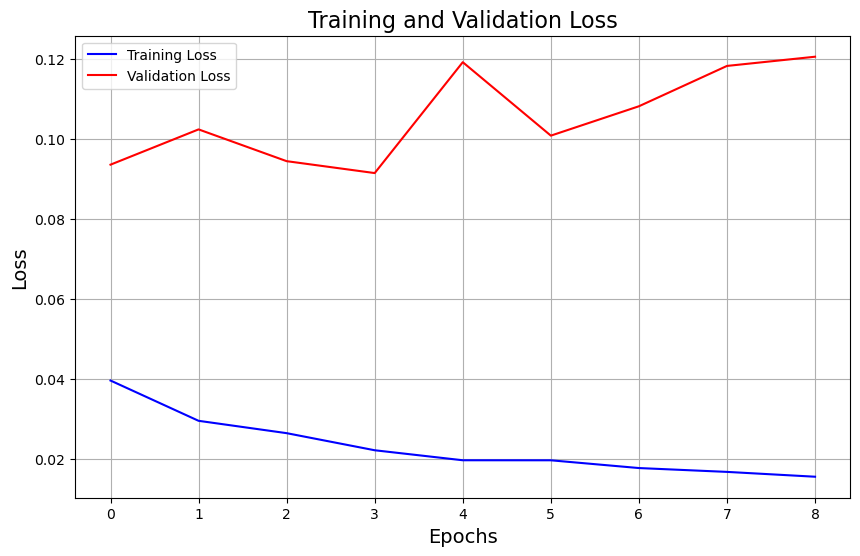

In [21]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model 
history = model.fit(
    X_train_split, y_train_split,
    validation_data=(X_val_split, y_val_split),
    epochs=20,
    batch_size=32,
    verbose=2,
    callbacks=[early_stopping]
)

# Plotting the loss function
plt.figure(figsize=(10, 6))

# Plot training loss
plt.plot(history.history['loss'], label='Training Loss', color='blue')

# Plot validation loss
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')

# Add titles and labels
plt.title('Training and Validation Loss', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)

# Add a legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()
